In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from IPython.display import display

data_path = '../Molecular_Properties'

In [3]:
files_names = !ls $data_path/*.csv
files_names

['../Molecular_Properties/dipole_moments.csv',
 '../Molecular_Properties/magnetic_shielding_tensors.csv',
 '../Molecular_Properties/mulliken_charges.csv',
 '../Molecular_Properties/potential_energy.csv',
 '../Molecular_Properties/sample_submission.csv',
 '../Molecular_Properties/scalar_coupling_contributions.csv',
 '../Molecular_Properties/structures.csv',
 '../Molecular_Properties/test.csv',
 '../Molecular_Properties/train.csv']

In [4]:
data_dict = {}

for name in files_names:
    data_dict[name.split('/')[-1][:-4]] = pd.read_csv(name)

In [5]:
df_complete = data_dict['train'].copy()
df_complete = df_complete.join(data_dict['potential_energy'].set_index('molecule_name'), on='molecule_name')
df_complete = df_complete.join(data_dict['dipole_moments'].set_index('molecule_name'), on='molecule_name', lsuffix='dipole_moments_')
df_complete = df_complete.join(data_dict['magnetic_shielding_tensors'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_0'], lsuffix='_atom0')
df_complete = df_complete.join(data_dict['magnetic_shielding_tensors'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_1'], lsuffix='_atom1')
df_complete = df_complete.join(data_dict['mulliken_charges'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_0'], lsuffix='_atom0')
df_complete = df_complete.join(data_dict['mulliken_charges'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_1'], lsuffix='_atom1')
df_complete = df_complete.join(data_dict['scalar_coupling_contributions'].set_index(['molecule_name', 'atom_index_0', 'atom_index_1']), on=['molecule_name', 'atom_index_0', 'atom_index_1'], rsuffix='_scc')
df_complete = df_complete.join(data_dict['structures'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_0'], lsuffix='_atom0_structure')
df_complete = df_complete.join(data_dict['structures'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_1'], lsuffix='_atom1_structure')

In [8]:
df= df_complete.drop(['id'], axis=1)
len(df)

4658147

In [7]:
#a bigger subsample for this model
df_subsample=  df.sample(frac=0.1, random_state=1)
len(df_subsample)

465815

In [13]:
#these features were chosen due to the results of lightgbm model from the SNS and LGB EDA notebook
features= df_subsample[['fc', 'pso', 'sd', 'dso', 'mulliken_charge_atom1', 'YY', 'XX_atom1', 'XX', 'ZZ', 'YY_atom1',
                       'mulliken_charge', 'potential_energy', 'ZZ_atom1', 'Z']]

In [14]:
features

,fc,pso,sd,dso,mulliken_charge_atom1,YY,XX_atom1,XX,ZZ,YY_atom1,mulliken_charge,potential_energy,ZZ_atom1,Z
2557043,2.348940,-0.033082,-0.034241,0.092030,0.232601,180.3960,29.5177,181.4930,182.7930,33.5564,-0.508960,-435.3620,25.1699,1.5065
1571490,-9.521030,1.903460,0.374256,-2.072480,0.116264,30.6437,26.8083,28.6370,28.7841,26.9144,0.124500,-421.9332,33.7409,1.1443
3815279,2.822460,0.307475,-0.062896,-0.553075,0.114498,102.3440,28.5014,94.3560,120.7070,30.7883,0.052715,-459.0387,22.9905,2.3221
3327074,0.365051,0.194738,-0.024773,-0.268798,0.096038,97.0485,30.2074,104.8590,105.2960,23.2356,0.270692,-460.3333,25.4791,1.5971
842927,7.688050,0.437421,0.111036,-0.451560,0.111746,27.0696,35.8985,35.8979,29.9001,27.0690,0.111749,-418.1772,29.9001,-0.0005
2140407,3.255910,0.329974,-0.018175,-0.392163,0.084225,102.3000,31.1637,131.5510,73.7504,31.2623,0.409009,-384.7619,26.2865,-1.2719
3680350,6.403150,0.204172,0.008111,-0.383134,0.254727,-73.1443,27.3955,8.2437,68.7723,31.7620,0.163884,-437.9416,33.3706,1.5549
2138509,103.204000,-0.271135,0.326960,1.176050,0.094574,111.7740,27.5733,112.7430,107.9920,26.5807,-0.195095,-400.7982,28.6064,1.1448
764496,-14.941700,2.464970,0.364028,-2.744870,0.145777,28.1549,30.8524,30.7456,30.3039,27.3038,0.145833,-364.9921,31.0117,-0.0023
3520100,6.724470,0.175627,-0.091349,-0.411963,0.093734,103.4430,28.2487,-6.7723,93.6850,34.1253,-0.061302,-388.5033,26.3072,0.6673


In [15]:
target= df_subsample[['scalar_coupling_constant']]
target

,scalar_coupling_constant
2557043,2.373650
1571490,-9.315790
3815279,2.513960
3327074,0.266218
842927,7.784940
2140407,3.175540
3680350,6.232300
2138509,104.436000
764496,-14.857600
3520100,6.396780


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
feature_train, feature_test, target_train, target_test= train_test_split(features, target, test_size=0.1)

In [19]:
print('total feature training features: ', len(feature_train))
print('total feature testing features: ', len(feature_test))
print('total target training features: ', len(target_train))
print('total target testing features: ', len(target_test))

total feature training features:  419233
total feature testing features:  46582
total target training features:  419233
total target testing features:  46582


In [20]:
feature_train.shape

(419233, 14)

In [21]:
target_train.shape

(419233, 1)

In [23]:
import lightgbm

In [25]:
#just to see if I missed any categorical. Don't need it
categorical_features = [c for c, col in enumerate(df_subsample.columns) if 'cat' in col]
categorical_features

[]

In [26]:
train_data = lightgbm.Dataset(feature_train, label=target_train, categorical_feature=categorical_features)
test_data = lightgbm.Dataset(feature_test, label=target_test)

In [27]:
#basic parameter: same as before
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}


In [28]:
model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

/Users/Iffy/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/Iffy/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's auc: 0.997202
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.99478
[3]	valid_0's auc: 0.995344
[4]	valid_0's auc: 0.998536
[5]	valid_0's auc: 0.998956
[6]	valid_0's auc: 0.999069
[7]	valid_0's auc: 0.999238
[8]	valid_0's auc: 0.999113
[9]	valid_0's auc: 0.999078
[10]	valid_0's auc: 0.99899
[11]	valid_0's auc: 0.998946
[12]	valid_0's auc: 0.99904
[13]	valid_0's auc: 0.999104
[14]	valid_0's auc: 0.99905
[15]	valid_0's auc: 0.999129
[16]	valid_0's auc: 0.999045
[17]	valid_0's auc: 0.999098
[18]	valid_0's auc: 0.999029
[19]	valid_0's auc: 0.999001
[20]	valid_0's auc: 0.998956
[21]	valid_0's auc: 0.998936
[22]	valid_0's auc: 0.998866
[23]	valid_0's auc: 0.998824
[24]	valid_0's auc: 0.998746
[25]	valid_0's auc: 0.998822
[26]	valid_0's auc: 0.998763
[27]	valid_0's auc: 0.998926
[28]	valid_0's auc: 0.999047
[29]	valid_0's auc: 0.999006
[30]	valid_0's auc: 0.998965
[31]	valid_0's auc: 0.999071
[32]	valid_0's auc: 0.999046
[33]	valid_0's auc: 0.

[281]	valid_0's auc: 0.999954
[282]	valid_0's auc: 0.999955
[283]	valid_0's auc: 0.999955
[284]	valid_0's auc: 0.999955
[285]	valid_0's auc: 0.999956
[286]	valid_0's auc: 0.999956
[287]	valid_0's auc: 0.999956
[288]	valid_0's auc: 0.999957
[289]	valid_0's auc: 0.999957
[290]	valid_0's auc: 0.999958
[291]	valid_0's auc: 0.999958
[292]	valid_0's auc: 0.999958
[293]	valid_0's auc: 0.999958
[294]	valid_0's auc: 0.999959
[295]	valid_0's auc: 0.999959
[296]	valid_0's auc: 0.999959
[297]	valid_0's auc: 0.99996
[298]	valid_0's auc: 0.999959
[299]	valid_0's auc: 0.999959
[300]	valid_0's auc: 0.999959
[301]	valid_0's auc: 0.999959
[302]	valid_0's auc: 0.99996
[303]	valid_0's auc: 0.99996
[304]	valid_0's auc: 0.99996
[305]	valid_0's auc: 0.99996
[306]	valid_0's auc: 0.99996
[307]	valid_0's auc: 0.99996
[308]	valid_0's auc: 0.999961
[309]	valid_0's auc: 0.999961
[310]	valid_0's auc: 0.999961
[311]	valid_0's auc: 0.999961
[312]	valid_0's auc: 0.999961
[313]	valid_0's auc: 0.999961
[314]	valid_0's a

[559]	valid_0's auc: 0.999973
[560]	valid_0's auc: 0.999973
[561]	valid_0's auc: 0.999973
[562]	valid_0's auc: 0.999973
[563]	valid_0's auc: 0.999973
[564]	valid_0's auc: 0.999973
[565]	valid_0's auc: 0.999973
[566]	valid_0's auc: 0.999973
[567]	valid_0's auc: 0.999973
[568]	valid_0's auc: 0.999973
[569]	valid_0's auc: 0.999973
[570]	valid_0's auc: 0.999973
[571]	valid_0's auc: 0.999973
[572]	valid_0's auc: 0.999973
[573]	valid_0's auc: 0.999973
[574]	valid_0's auc: 0.999973
[575]	valid_0's auc: 0.999973
[576]	valid_0's auc: 0.999973
[577]	valid_0's auc: 0.999973
[578]	valid_0's auc: 0.999973
[579]	valid_0's auc: 0.999973
[580]	valid_0's auc: 0.999973
[581]	valid_0's auc: 0.999973
[582]	valid_0's auc: 0.999973
[583]	valid_0's auc: 0.999973
[584]	valid_0's auc: 0.999973
[585]	valid_0's auc: 0.999973
[586]	valid_0's auc: 0.999973
[587]	valid_0's auc: 0.999973
[588]	valid_0's auc: 0.999973
[589]	valid_0's auc: 0.999973
[590]	valid_0's auc: 0.999973
[591]	valid_0's auc: 0.999973
[592]	vali

[834]	valid_0's auc: 0.999976
[835]	valid_0's auc: 0.999976
[836]	valid_0's auc: 0.999976
[837]	valid_0's auc: 0.999976
[838]	valid_0's auc: 0.999976
[839]	valid_0's auc: 0.999976
[840]	valid_0's auc: 0.999976
[841]	valid_0's auc: 0.999976
[842]	valid_0's auc: 0.999976
[843]	valid_0's auc: 0.999976
[844]	valid_0's auc: 0.999976
[845]	valid_0's auc: 0.999976
[846]	valid_0's auc: 0.999976
[847]	valid_0's auc: 0.999976
[848]	valid_0's auc: 0.999976
[849]	valid_0's auc: 0.999976
[850]	valid_0's auc: 0.999976
[851]	valid_0's auc: 0.999976
[852]	valid_0's auc: 0.999976
[853]	valid_0's auc: 0.999976
[854]	valid_0's auc: 0.999976
[855]	valid_0's auc: 0.999976
[856]	valid_0's auc: 0.999976
[857]	valid_0's auc: 0.999976
[858]	valid_0's auc: 0.999976
[859]	valid_0's auc: 0.999976
[860]	valid_0's auc: 0.999976
[861]	valid_0's auc: 0.999976
[862]	valid_0's auc: 0.999976
[863]	valid_0's auc: 0.999976
[864]	valid_0's auc: 0.999976
[865]	valid_0's auc: 0.999976
[866]	valid_0's auc: 0.999976
[867]	vali

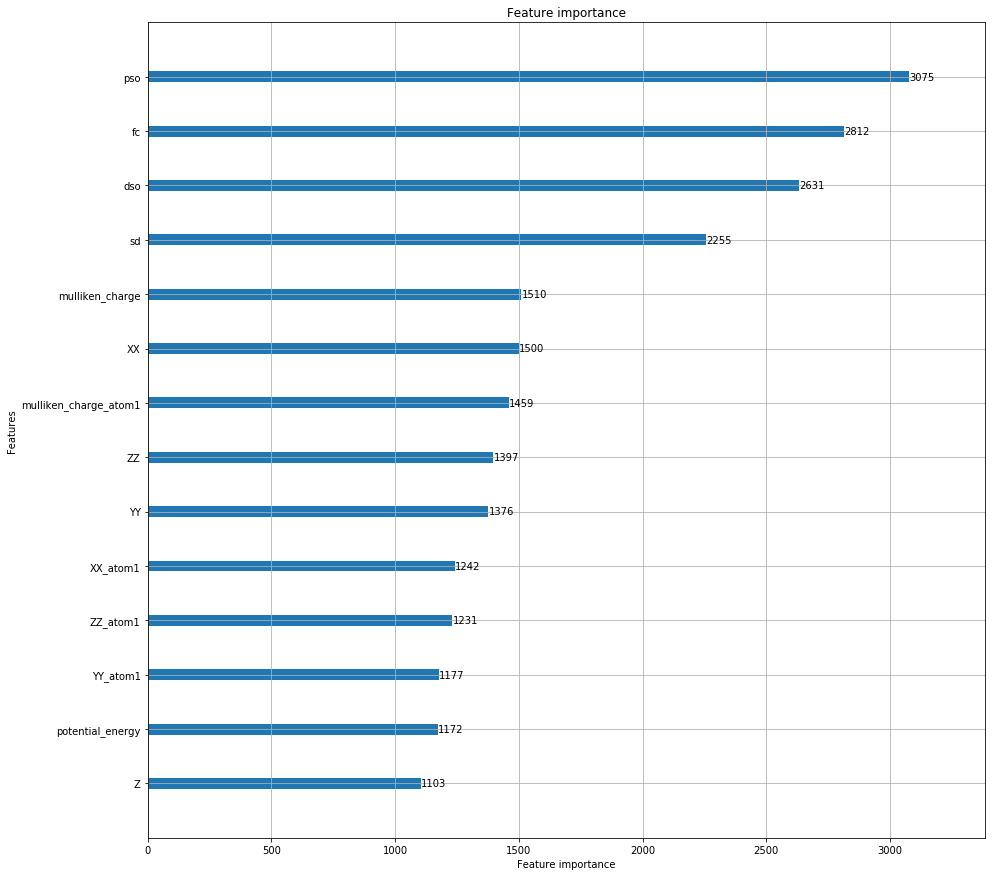

In [29]:
#Wanted to visualize the weight difference between each features. heavy imbalance between top 4 and the rest
ax = lightgbm.plot_importance(model, max_num_features=40, figsize=(15,15))
plt.show()